In [1]:
import numpy as np

In [2]:
def rotn(n, t):
    """
    R = ROTN(N, T)
    Function that returns the 3x3 rotation matrix around diretion 'N' of
    angle T:
        - n: unitary vector in R^3.
        - T: rotation angle in degrees.
    """

    # Guarantees that |n| = 1.
    if np.linalg.norm(n) != 1:
        n = n/np.linalg.norm(n)
    
    nx = n[0]
    ny = n[1]
    nz = n[2]
    
    t = np.deg2rad(t)
    
    ct = np.cos(t)
    vt = 1 - ct
    st = np.sin(t)

    return np.array(
            [
                    [nx**2*vt + ct,     nx*ny*vt - nz*st,   nx*nz*vt + ny*st],
                    [nx*ny*vt + nz*st,  ny**2*vt + ct,      ny*nz*vt - nx*st],
                    [nx*nz*vt - ny*st,  ny*nz*vt + nx*st,   nz**2*vt + ct]
            ])

In [5]:
#%% Example - Rotate [0, 1, 0] of 240 deg around direction [1, 1, 1] to 
#   get [1, 0, 0] as a result.
n = np.array([1, 1, 1])
r = rotn(n,240)
pl = np.array([0, 1, 0])
p = np.matmul(r, pl)
print(p)

[ 1.00000000e+00 -1.11022302e-16  4.44089210e-16]


In [6]:
#%% Example - Make multiple rotations of increasing angles:
t = np.linspace(0, 360, 35)
p = np.zeros((3,len(t)))
for i in range(len(t)):
    print(t[i])
    p[:,i] = np.matmul(rotn(n,t[i]), np.array([0,1,0]).reshape(3,1)).reshape(3,)

0.0
10.588235294117647
21.176470588235293
31.764705882352942
42.35294117647059
52.94117647058823
63.529411764705884
74.11764705882352
84.70588235294117
95.29411764705883
105.88235294117646
116.47058823529412
127.05882352941177
137.64705882352942
148.23529411764704
158.8235294117647
169.41176470588235
180.0
190.58823529411765
201.17647058823528
211.76470588235293
222.35294117647058
232.94117647058823
243.52941176470588
254.11764705882354
264.70588235294116
275.29411764705884
285.88235294117646
296.4705882352941
307.05882352941177
317.6470588235294
328.2352941176471
338.8235294117647
349.4117647058823
360.0


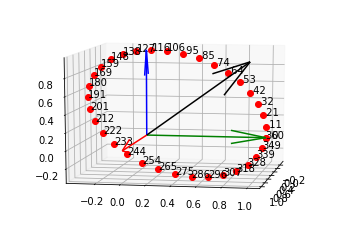

In [9]:
#%% Exmple - Make multiple rotations of increasing angles:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = axes3d(fig)
xs = p[0, :]
ys = p[1, :]
zs = p[2, :]
ax.plot(xs, ys, zs, 'ro')
ax.quiver(0, 0, 0, 1, 0, 0, color = 'r')
ax.quiver(0, 0, 0, 0, 1, 0, color = 'g')
ax.quiver(0, 0, 0, 0, 0, 1, color = 'b')
ax.quiver(0, 0, 0, 1, 1, 1, color = 'k')
for i in range(len(t)):
    ax.text(xs[i], ys[i], zs[i], '{:3.0f}'.format(t[i]))
ax.view_init(10, 10)
plt.show()